In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('C:/Users/subha/OneDrive/Desktop/Project/data/electricity_dah_prices.csv')

In [5]:
data.head()

,date,hour,france,italy,belgium,spain,uk,germany
0,2022/01/01,00:00 - 01:00,89.06,170.28,82.02,145.86,0.27,50.05
1,2022/01/01,01:00 - 02:00,78.48,155.72,67.07,114.90,-0.01,41.33
2,2022/01/01,02:00 - 03:00,85.16,147.09,75.11,113.87,0.27,43.22
3,2022/01/01,03:00 - 04:00,50.00,91.00,50.91,97.80,-0.01,45.46
4,2022/01/01,04:00 - 05:00,37.67,104.00,37.67,97.80,-0.01,37.67


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8761 entries, 0 to 8760
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     8761 non-null   object 
 1   hour     8761 non-null   object 
 2   france   8760 non-null   float64
 3   italy    8760 non-null   float64
 4   belgium  8760 non-null   float64
 5   spain    8760 non-null   float64
 6   uk       7319 non-null   float64
 7   germany  8760 non-null   float64
dtypes: float64(6), object(2)
memory usage: 547.7+ KB


In [7]:
data.shape

(8761, 8)

In [8]:
data.isnull().sum()

date          0
hour          0
france        1
italy         1
belgium       1
spain         1
uk         1442
germany       1
dtype: int64

<Axes: >

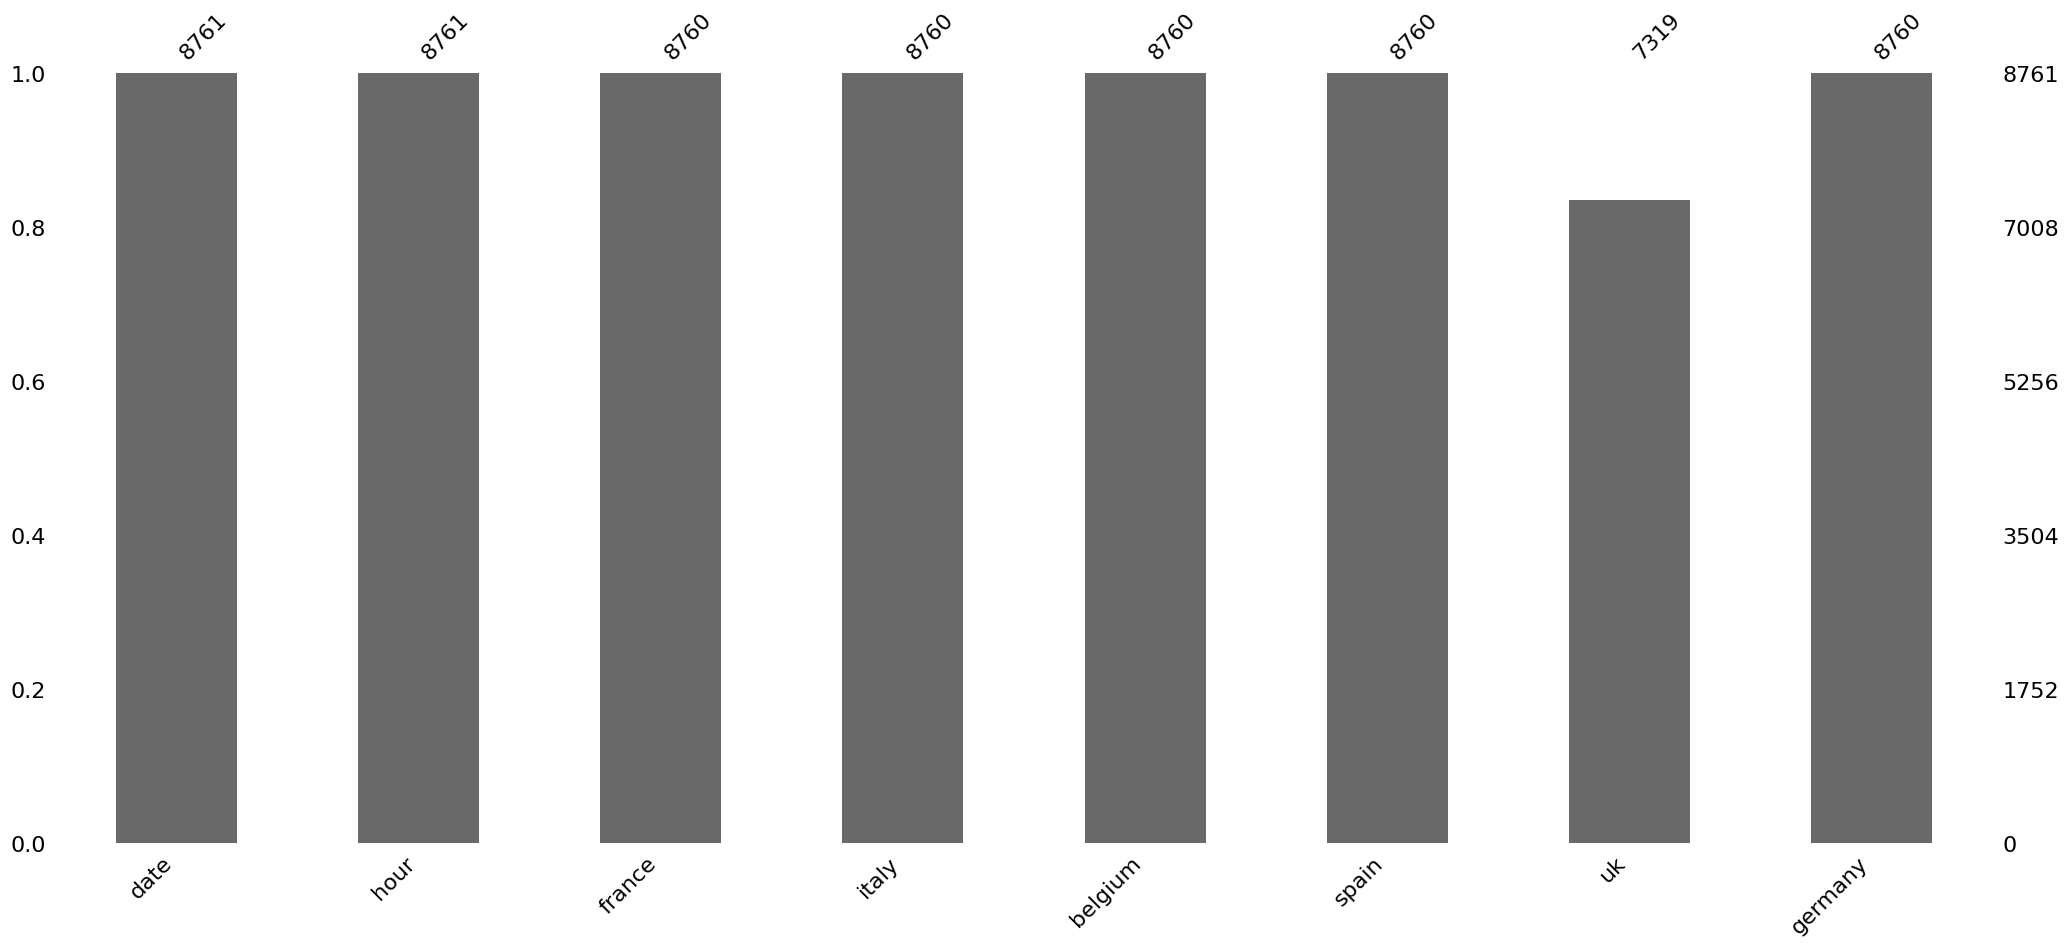

In [9]:
import missingno as msno

msno.bar(data)